# 🤖 LangGraph Multi-Agent Systems - Class 6

## 📋 Overview

This notebook demonstrates **advanced multi-agent orchestration** using **LangGraph**, a powerful framework for building stateful, graph-based AI workflows. The focus is on creating collaborative AI agents that can hand off tasks to each other and work together to solve complex problems.

---

## 🎯 Learning Objectives

By the end of this notebook, you will understand:

1. **Command-based State Management** - How to use `Command` objects to control agent flow and update state
2. **Agent Handoff Patterns** - Building agents that can transfer tasks to specialized agents
3. **Tool Binding** - Connecting LLMs with custom tools for enhanced capabilities
4. **Multi-Agent Collaboration** - Creating networks of agents that work together
5. **Real-world Tool Integration** - Using search APIs and Python REPL for dynamic task execution

---

## 🏗️ Architecture Overview

### Part 1: Basic Command & State Management
- Introduction to `Command` objects from `langgraph.types`
- Understanding state updates and navigation between nodes

### Part 2: Collaborative Multi-Agent System (Math Experts)
```
┌─────────────────────┐         ┌─────────────────────────┐
│   Addition Expert   │ ◄─────► │  Multiplication Expert  │
│  (handles + ops)    │         │    (handles × ops)      │
└─────────────────────┘         └─────────────────────────┘
```
- Two specialized agents that hand off tasks based on the operation required
- Demonstrates **network/collaborative multi-agent** pattern

### Part 3: Research & Chart Generation Pipeline
```
┌──────────────┐      ┌───────────────────┐
│  Researcher  │ ───► │  Chart Generator  │
│ (Web Search) │ ◄─── │  (Python REPL)    │
└──────────────┘      └───────────────────┘
```
- **Researcher Agent**: Uses Tavily Search API to gather real-time data
- **Chart Generator Agent**: Uses Python REPL to create visualizations

---

## 🛠️ Key Components Used

| Component | Purpose |
|-----------|---------|
| `langgraph.types.Command` | Control flow and state updates between nodes |
| `langgraph.prebuilt.create_react_agent` | Create ReAct-style agents |
| `langgraph.graph.StateGraph` | Build the agent workflow graph |
| `langgraph.graph.MessagesState` | Manage conversation history |
| `langchain_core.tools.tool` | Define custom tools for agents |
| `TavilySearchResults` | Real-time web search capability |
| `PythonREPL` | Execute Python code dynamically |

---

## 🔑 Key Concepts Explained

### 1. Command Object
```python
Command(goto="next_node", update={"key": "value"})
```
- **`goto`**: Specifies the next node to execute
- **`update`**: Updates the state with new values

### 2. Tool-based Agent Handoff
Agents use "transfer" tools to signal when they need help from another specialist:
- `transfer_to_multiplication_expert()` - Delegates multiplication tasks
- `transfer_to_addition_expert()` - Delegates addition tasks

### 3. Dynamic Routing
The system dynamically routes between agents based on:
- Tool calls made by the LLM
- The "FINAL ANSWER" signal indicating task completion

---

## 📦 Dependencies

```python
# Core
langchain-openai
langgraph
python-dotenv

# Tools & Utilities
langchain-tavily          # Web search
langchain-experimental    # Python REPL
matplotlib                # Chart generation
```

---

## 🚀 Use Cases Demonstrated

1. **Mathematical Problem Solving**: `(3 + 5) × 12` - Agents collaborate to solve compound expressions
2. **Data Research & Visualization**: Fetch UK GDP data and generate line charts automatically

---

## 📝 Summary

This notebook showcases the power of **LangGraph** for building sophisticated multi-agent systems where:
- ✅ Agents have **specialized roles** and can delegate tasks
- ✅ **State is managed** across agent transitions
- ✅ **Real-world tools** (search, code execution) are integrated seamlessly
- ✅ Agents **collaborate** until reaching a final answer

This pattern is foundational for building complex AI workflows like:
- Customer support systems with escalation
- Research assistants with data analysis capabilities
- Automated report generation pipelines

---

*Author: Krish Naik | LangGraph Series*

In [1]:
from dotenv import load_dotenv

In [2]:
load_dotenv()

True

In [3]:
import os
os.environ["OPENAI_API_KEY"]=os.getenv("OPENAI_API_KEY")

In [4]:
from langchain_openai import ChatOpenAI
llm = ChatOpenAI(model="gpt-4o")

In [5]:
llm.invoke("hi hello how are you?")

AIMessage(content="Hello! I'm here to help, so if you have any questions or need assistance, feel free to ask. How can I assist you today?", additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 29, 'prompt_tokens': 13, 'total_tokens': 42, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_provider': 'openai', 'model_name': 'gpt-4o-2024-08-06', 'system_fingerprint': 'fp_deacdd5f6f', 'id': 'chatcmpl-CxVoKNoGk7aIQkQyXXZScS3Pt1Kfw', 'service_tier': 'default', 'finish_reason': 'stop', 'logprobs': None}, id='lc_run--019bb6df-ad17-7f02-a03a-927e9a21c0ea-0', usage_metadata={'input_tokens': 13, 'output_tokens': 29, 'total_tokens': 42, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}})

In [6]:
from langgraph.types import Command

In [7]:
from langgraph.prebuilt import create_react_agent

In [8]:
def add_number(state):
    result=state["num1"]+state["num2"]
    print(f"addition is {result}")
    return Command(goto="multiply",update={"sum":result})

In [9]:

state={"num1":10,"num2":20}

In [10]:
add_number(state)

addition is 30


Command(update={'sum': 30}, goto='multiply')

## Creating one dummy multiagent
- it is for network/collab multiagent

In [11]:
from langchain_core.tools import tool

In [12]:
@tool
def transfer_to_multiplication_expert():
    """Ask multiplication agent for help"""
    return

In [13]:
@tool
def transfer_to_addition_expert():
    """Ask addition agent for help"""
    return

In [14]:
llm_with_tool=llm.bind_tools([transfer_to_addition_expert])

In [15]:
response=llm_with_tool.invoke("hi")

In [16]:
response.content

'Hello! How can I help you today?'

In [17]:

response.tool_calls

[]

In [18]:
response=llm_with_tool.invoke("what is 2+2?")

In [19]:
response.content

''

In [20]:
response.tool_calls

[{'name': 'transfer_to_addition_expert',
  'args': {},
  'id': 'call_D8WCQFVxgjNg802O4fAnFmmP',
  'type': 'tool_call'}]

In [21]:
system_prompt = (
        "You are an addition expert, you can ask the multiplication expert for help with multiplication."
        "Always do your portion of calculation before the handoff."
    )

In [22]:
messages = [{"role": "system", "content": system_prompt}] + ["can you tell me the addition of 2 and 2?"]

In [23]:
messages


[{'role': 'system',
  'content': 'You are an addition expert, you can ask the multiplication expert for help with multiplication.Always do your portion of calculation before the handoff.'},
 'can you tell me the addition of 2 and 2?']

In [24]:
from typing_extensions import Literal
from langgraph.graph import MessagesState,StateGraph, START,END

In [25]:
def additional_expert(state:MessagesState)-> Command[Literal["multiplication_expert", "__end__"]]:
    
    system_prompt = (
        "You are an addition expert, you can ask the multiplication expert for help with multiplication."
        "Always do your portion of calculation before the handoff."
    )
    
    messages = [{"role": "system", "content": system_prompt}] + state["messages"]
    
    
    ai_msg = llm.bind_tools([transfer_to_multiplication_expert]).invoke(messages)
    
    
    if len(ai_msg.tool_calls) > 0:
        tool_call_id = ai_msg.tool_calls[-1]["id"]
        tool_msg = {
            "role": "tool",
            "content": "Successfully transferred",
            "tool_call_id": tool_call_id,
        }
        
        return Command(
            goto="multiplication_expert", update={"messages": [ai_msg, tool_msg]}
        )
    return {"messages": [ai_msg]}

In [26]:
##Agent2
def multiplication_expert(state:MessagesState)-> Command[Literal["additional_expert", "__end__"]]:
    
    system_prompt = (
        "You are a multiplication expert, you can ask an addition expert for help with addition. "
        "Always do your portion of calculation before the handoff."
    )
    
    messages = [{"role": "system", "content": system_prompt}] + state["messages"]
    
    ai_msg = llm.bind_tools([transfer_to_addition_expert]).invoke(messages)
    
    if len(ai_msg.tool_calls) > 0:
        tool_call_id = ai_msg.tool_calls[-1]["id"]
        tool_msg = {
            "role": "tool",
            "content": "Successfully transferred",
            "tool_call_id": tool_call_id,
        }
        return Command(goto="additional_expert", update={"messages": [ai_msg, tool_msg]})
    return {"messages": [ai_msg]}

In [27]:
graph=StateGraph(MessagesState)

In [28]:
graph.add_node("additional_expert",additional_expert)
graph.add_node("multiplication_expert",multiplication_expert)

In [29]:
graph.add_edge(START, "additional_expert")

In [30]:
app=graph.compile()

In [31]:
app.invoke({"messages":[("user","what's (3 + 5) * 12. Provide me the output")]})

{'messages': [HumanMessage(content="what's (3 + 5) * 12. Provide me the output", additional_kwargs={}, response_metadata={}, id='288ae05d-0ed6-4e02-90d4-d7f4a1dfc4ae'),
  AIMessage(content='', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 33, 'prompt_tokens': 86, 'total_tokens': 119, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_provider': 'openai', 'model_name': 'gpt-4o-2024-08-06', 'system_fingerprint': 'fp_deacdd5f6f', 'id': 'chatcmpl-CxW7KwjK5VSEzh6EoJzvn7siDNbXQ', 'service_tier': 'default', 'finish_reason': 'tool_calls', 'logprobs': None}, id='lc_run--019bb6f1-a784-70b3-96d7-b89e41f7cde0-0', tool_calls=[{'name': 'transfer_to_multiplication_expert', 'args': {}, 'id': 'call_M6SKpuBsoAhvJ55ouinvOe7o', 'type': 'tool_call'}], usage_metadata={'input_tokens': 86, 'output_tokens

## With realtime tool

In [32]:
from langchain_community.tools import DuckDuckGoSearchRun

In [34]:
pip install -U langchain-tavily

Note: you may need to restart the kernel to use updated packages.


In [36]:
# search_tool=DuckDuckGoSearchRun()

import os
from langchain_tavily import TavilySearch
from langchain_community.tools.tavily_search import TavilySearchResults
TAVILY_API_KEY=os.getenv("TAVILY_API_KEY")
search_tool=TavilySearchResults(tavily_api_key=TAVILY_API_KEY)

c:\Users\Atif\miniconda3\envs\Agatic_Ai\Lib\site-packages\langchain_tavily\tavily_research.py:97: UserWarning: Field name "output_schema" in "TavilyResearch" shadows an attribute in parent "BaseTool"
  class TavilyResearch(BaseTool):  # type: ignore[override, override]
c:\Users\Atif\miniconda3\envs\Agatic_Ai\Lib\site-packages\langchain_tavily\tavily_research.py:97: UserWarning: Field name "stream" in "TavilyResearch" shadows an attribute in parent "BaseTool"
  class TavilyResearch(BaseTool):  # type: ignore[override, override]


In [37]:
search_tool.invoke("who is a current pm of uk?")

[{'title': 'Prime Minister of the United Kingdom - Wikipedia',
  'url': 'https://en.wikipedia.org/wiki/Prime_Minister_of_the_United_Kingdom',
  'content': 'Main article: Prime Minister\'s Questions\n\nPrime Minister\'s Questions is a constitutional convention "Constitutional convention (political custom)"), currently held as a single session every Wednesday at noon when the House of Commons is sitting, in which the prime minister answers questions from members of Parliament "Member of Parliament (United Kingdom)") (MPs). The leader of the opposition usually asks the prime minister six questions, and the leader of the third-largest parliamentary party can ask two questions. It is an occasion when the prime minister appears regularly on live television and radio.\n\n\n\nThe current prime minister, Keir Starmer, speaking in the House of Commons on 4 September 2024 [...] This was in response to the 2024 Labour Party freebies controversy, in which the current prime minister, Keir Starmer, h

In [40]:
%pip install -U langchain-experimental
from langchain_experimental.utilities import PythonREPL

Note: you may need to restart the kernel to use updated packages.


In [41]:
repl=PythonREPL()

In [42]:
code = """
x = 5
y = x * 2
print(y)
"""

In [43]:
repl.run(code)

Python REPL can execute arbitrary code. Use with caution.


'10\n'

In [44]:
from typing import Annotated

In [45]:
@tool
def python_repl_tool(
    code: Annotated[str, "The python code to execute to generate your chart."],
):
    """Use this to execute python code. If you want to see the output of a value,
    you should print it out with `print(...)`. This is visible to the user."""
    
    try:
        result = repl.run(code)
    except BaseException as e:
        return f"Failed to execute. Error: {repr(e)}"
    
    result_str = f"Successfully executed:\n\`\`\`python\n{code}\n\`\`\`\nStdout: {result}"
    return (
        result_str + "\n\nIf you have completed all tasks, respond with FINAL ANSWER."
    )

In [46]:
python_repl_tool

StructuredTool(name='python_repl_tool', description='Use this to execute python code. If you want to see the output of a value,\n    you should print it out with `print(...)`. This is visible to the user.', args_schema=<class 'langchain_core.utils.pydantic.python_repl_tool'>, func=<function python_repl_tool at 0x000002A1DC907D80>)

In [47]:
print(python_repl_tool.invoke(code))

Successfully executed:
\`\`\`python

x = 5
y = x * 2
print(y)

\`\`\`
Stdout: 10


If you have completed all tasks, respond with FINAL ANSWER.


In [48]:
print(python_repl_tool.invoke(code))

Successfully executed:
\`\`\`python

x = 5
y = x * 2
print(y)

\`\`\`
Stdout: 10


If you have completed all tasks, respond with FINAL ANSWER.


In [49]:
def make_system_prompt(instruction:str)->str:
    return  (
        "You are a helpful AI assistant, collaborating with other assistants."
        " Use the provided tools to progress towards answering the question."
        " If you are unable to fully answer, that's OK, another assistant with different tools "
        " will help where you left off. Execute what you can to make progress."
        " If you or any of the other assistants have the final answer or deliverable,"
        " prefix your response with FINAL ANSWER so the team knows to stop."
        f"\n{instruction}"
    )

In [50]:
make_system_prompt("You can only do research. You are working with a chart generator colleague.")

"You are a helpful AI assistant, collaborating with other assistants. Use the provided tools to progress towards answering the question. If you are unable to fully answer, that's OK, another assistant with different tools  will help where you left off. Execute what you can to make progress. If you or any of the other assistants have the final answer or deliverable, prefix your response with FINAL ANSWER so the team knows to stop.\nYou can only do research. You are working with a chart generator colleague."

In [51]:
from langchain_core.messages import BaseMessage, HumanMessage

In [52]:
def get_next_node(last_message:BaseMessage, goto:str):
    if "FINAL ANSWER" in last_message.content:
        # Any agent decided the work is done
        return END
    return goto

In [54]:
#agent1
def research_node(state:MessagesState)->Command[Literal["chart_generator", END]]:
    research_agent=create_react_agent(
        llm,
        tools=[search_tool],
        prompt=make_system_prompt(
        "You can only do research. You are working with a chart generator colleague."
    ), 
        )
    
    
    
    result=research_agent.invoke(state)
    
    goto=get_next_node(result["messages"][-1], "chart_generator")
    
    result["messages"][-1] = HumanMessage(content=result["messages"][-1].content, name="researcher")
    
    return Command(update={"messages": result["messages"]},goto=goto)

In [56]:
# agent1(human1)-->agent2(human2)

In [57]:
#agent2
def chart_node(state:MessagesState)-> Command[Literal["researcher", END]]:
    chart_agent=create_react_agent(
        llm,
        tools=[python_repl_tool],
        prompt=make_system_prompt(
        "You can only generate charts. You are working with a researcher colleague."
    ),
        )
    result=chart_agent.invoke(state)
    goto=get_next_node(result["messages"][-1],"researcher")
    result["messages"][-1] = HumanMessage(content=result["messages"][-1].content, name="chart_generator")
    return Command(update={"messages": result["messages"]},goto=goto)

In [58]:
workflow = StateGraph(MessagesState)
workflow.add_node("researcher", research_node)
workflow.add_node("chart_generator", chart_node)

workflow.add_edge(START, "researcher")
app = workflow.compile()

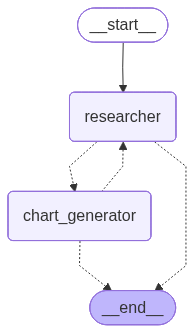

In [59]:
workflow.compile()

In [60]:
app.invoke({"messages": [("user","get the UK's GDP over the past 3 years, then make a line chart of it.Once you make the chart, finish.")],})

C:\Users\Atif\AppData\Local\Temp\ipykernel_6052\562786082.py:3: LangGraphDeprecatedSinceV10: create_react_agent has been moved to `langchain.agents`. Please update your import to `from langchain.agents import create_agent`. Deprecated in LangGraph V1.0 to be removed in V2.0.
  research_agent=create_react_agent(


{'messages': [HumanMessage(content="get the UK's GDP over the past 3 years, then make a line chart of it.Once you make the chart, finish.", additional_kwargs={}, response_metadata={}, id='7bb643e7-8f80-4a8e-8cbd-fbc188d7d38a'),
  AIMessage(content='', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 26, 'prompt_tokens': 205, 'total_tokens': 231, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_provider': 'openai', 'model_name': 'gpt-4o-2024-08-06', 'system_fingerprint': 'fp_deacdd5f6f', 'id': 'chatcmpl-CxWTjRC0TitsSQAvvMIaOJdfGT5La', 'service_tier': 'default', 'finish_reason': 'tool_calls', 'logprobs': None}, id='lc_run--019bb706-dc1b-7901-af15-5ef61bef8dab-0', tool_calls=[{'name': 'tavily_search_results_json', 'args': {'query': 'UK GDP 2020 to 2023'}, 'id': 'call_uZ1wjw0CmrMcxF2gh

In [61]:
code="""import matplotlib.pyplot as plt\\n\\n# Data for the UK GDP over the past 3 years\\nyears = [2019, 2020, 2021]\\ngdp_values = [2851.41, 2697.81, 3141.51]  # in billion $ \\n\\ndef create_line_chart(years, gdp_values):\\n    plt.figure(figsize=(10, 6))\\n    plt.plot(years, gdp_values, marker=\'o\', color=\'b\', linestyle=\'-\', linewidth=2)\\n    plt.title(\'UK GDP Over the Past 3 Years\')\\n    plt.xlabel(\'Year\')\\n    plt.ylabel(\'GDP (in billion $)\')\\n    plt.grid(True)\\n    plt.tight_layout()\\n    plt.show()"""

In [64]:
!pip install matplotlib
import matplotlib.pyplot as plt

  Using cached matplotlib-3.10.8-cp311-cp311-win_amd64.whl.metadata (52 kB)
  Using cached contourpy-1.3.3-cp311-cp311-win_amd64.whl.metadata (5.5 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached fonttools-4.61.1-cp311-cp311-win_amd64.whl.metadata (116 kB)
  Using cached kiwisolver-1.4.9-cp311-cp311-win_amd64.whl.metadata (6.4 kB)
  Using cached pillow-12.1.0-cp311-cp311-win_amd64.whl.metadata (9.0 kB)
  Using cached pyparsing-3.3.1-py3-none-any.whl.metadata (5.6 kB)
Using cached matplotlib-3.10.8-cp311-cp311-win_amd64.whl (8.1 MB)
Using cached contourpy-1.3.3-cp311-cp311-win_amd64.whl (225 kB)
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
Using cached fonttools-4.61.1-cp311-cp311-win_amd64.whl (2.3 MB)
Using cached kiwisolver-1.4.9-cp311-cp311-win_amd64.whl (73 kB)
Using cached pillow-12.1.0-cp311-cp311-win_amd64.whl (7.0 MB)
Using cached pyparsing-3.3.1-py3-none-any.whl (121 kB)

   ---------------------------------------- 0/7 [pyparsing]
   -

In [65]:
print("""import matplotlib.pyplot as plt\\n\\n# Data for the UK GDP over the past 3 years\\nyears = [2019, 2020, 2021]\\ngdp_values = [2851.41, 2697.81, 3141.51]  # in billion $ \\n\\ndef create_line_chart(years, gdp_values):\\n    plt.figure(figsize=(10, 6))\\n    plt.plot(years, gdp_values, marker=\'o\', color=\'b\', linestyle=\'-\', linewidth=2)\\n    plt.title(\'UK GDP Over the Past 3 Years\')\\n    plt.xlabel(\'Year\')\\n    plt.ylabel(\'GDP (in billion $)\')\\n    plt.grid(True)\\n    plt.tight_layout()\\n    plt.show()""")

import matplotlib.pyplot as plt\n\n# Data for the UK GDP over the past 3 years\nyears = [2019, 2020, 2021]\ngdp_values = [2851.41, 2697.81, 3141.51]  # in billion $ \n\ndef create_line_chart(years, gdp_values):\n    plt.figure(figsize=(10, 6))\n    plt.plot(years, gdp_values, marker='o', color='b', linestyle='-', linewidth=2)\n    plt.title('UK GDP Over the Past 3 Years')\n    plt.xlabel('Year')\n    plt.ylabel('GDP (in billion $)')\n    plt.grid(True)\n    plt.tight_layout()\n    plt.show()


In [70]:
# Assuming documents is a list of text or objects you intended to use
documents = ["doc1", "doc2"] 
retriver_tool=documents

def fun(document):
    # calculation placeholder
    pass

In [72]:
llm_with_bind_tool=llm.bind_tools([fun])

In [74]:
query = "tell me about doc1"
llm_with_bind_tool.invoke(query)

AIMessage(content='Could you please provide more details or the content of "doc1" so I can assist you better?', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 22, 'prompt_tokens': 41, 'total_tokens': 63, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_provider': 'openai', 'model_name': 'gpt-4o-2024-08-06', 'system_fingerprint': 'fp_a0e9480a2f', 'id': 'chatcmpl-CxWfW7MUnLTLiFpWcZILxdD2R3HbM', 'service_tier': 'default', 'finish_reason': 'stop', 'logprobs': None}, id='lc_run--019bb711-fe9c-7960-a4e0-0a51b9003a8b-0', usage_metadata={'input_tokens': 41, 'output_tokens': 22, 'total_tokens': 63, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}})

In [79]:
response = llm_with_bind_tool.invoke(query)
response.tool_calls

[]

In [81]:
tools_map = {
    "fun": fun,
}

In [90]:

tool_calls = response.tool_calls
if tool_calls:
	func = tools_map[tool_calls[0]['name']]

In [ ]:
# Assuming you want to call the function 'fun' which is mapped in tools_map
func = tools_map["fun"]
func(documents[0])